# Publishing rate analysis

[The Research Productivity of New PhDs in Economics: The Surprisingly High Non-success of the Successful](https://www.aeaweb.org/articles?id=10.1257/jep.28.3.205)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import theano.tensor as tt
import pymc3 as pm
import arviz as az

sns.set_palette("husl")

In [2]:
# Switch to the fake data if you don't have access to the real data.
# raw_data = pd.read_csv("fake_data/fake_data.csv")
raw_data = pd.read_excel("raw_data/data/Conley_Onder_JEPdata.xlsx")

## Visualize

Let's visualize the data first to get an idea of what we're modelling.

TODO

*   Finish kdeplot of all 31 individual schools
*   Add a master line showing the mean of all schools
*   3d plot showing each school?
*   Top 3 schools, UBC, Toronto, 31+

AttributeError: 'DataFrame' object has no attribute 'Rank'

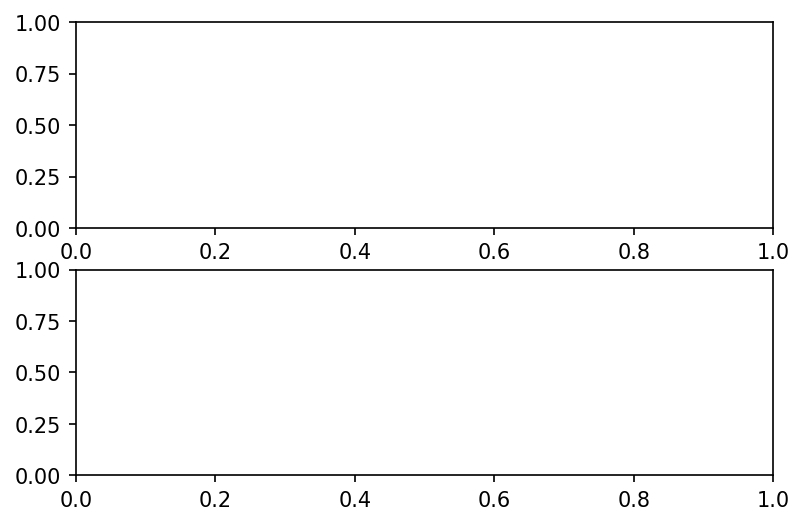

In [65]:
fig, ax = plt.subplots(2,1,figsize=(6,4))
fig.set_dpi(150)

mean_pub = raw_data[["AERPub", "Rank"]].groupby(["Rank"]).mean()

ax[0].scatter(mean_pub.index, mean_pub.Rank)

# sns.kdeplot(raw_data.AERPub, alpha=0.4, ax=ax[0]);
# for i in range(5):
#     sns.distplot(raw_data[raw_data.Rank == i].AERPub, ax=ax[0], kde=False)
#     sns.kdeplot(raw_data[raw_data.Rank == i].AERPub, ax=ax[0], legend=False, bw=0.5,
#                 alpha=0.3, linewidth=0.6).set(xlim=(0,0.3));


In [82]:
# raw_data[["AERPub", "Rank"]].groupby(["Rank"]).mean().AERPub
# raw_data.groupby("Rank")["AERPub"].quantile(0.5)
grouped_ry = raw_data.groupby(["Rank", "Year"], as_index=False)["AERPub"]

In [93]:
def q50(x):
    return x.quantile(.50)

def q75(x):
    return x.quantile(.75)

def q80(x):
    return x.quantile(.80)

def q90(x):
    return x.quantile(.90)

def q95(x):
    return x.quantile(.95)

def q99(x):
    return x.quantile(.99)

aggregation_dict = {"Count": "count", "Max": "max", "99th": q99, "95th": q95, "90th": q90, "80th": q80, "50th": q50}

In [96]:
quantiled_by_year_rank = grouped_ry.agg(aggregation_dict)
quantiled_by_year_rank

,Rank,Year,Count,Max,99th,95th,90th,80th,50th
0,1,1986,5,5.183317,5.143386,4.983664,4.784010,4.384703,2.578717
1,1,1987,8,7.054300,6.836687,5.966237,4.878175,3.892510,3.096921
2,1,1988,9,2.311600,2.220647,1.856833,1.402066,0.658333,0.012000
3,1,1989,26,1.233000,1.084688,0.635275,0.369408,0.098900,0.000000
4,1,1990,36,2.468000,2.353002,2.053183,1.457050,0.630033,0.115875
...,...,...,...,...,...,...,...,...,...
449,31,1996,479,2.334100,0.784594,0.280805,0.136853,0.035200,0.000000
450,31,1997,485,0.903650,0.632465,0.241900,0.075027,0.025000,0.000000
451,31,1998,564,1.551500,0.934181,0.335628,0.121365,0.034770,0.000000
452,31,1999,485,2.115650,0.749026,0.227357,0.110790,0.036020,0.000000


In [104]:
quantile_names = ["99th", "95th", "90th", "80th", "50th"]
mean_aer_quantiles = quantiled_by_year_rank.groupby(["Rank"], as_index=False)[quantile_names].mean();

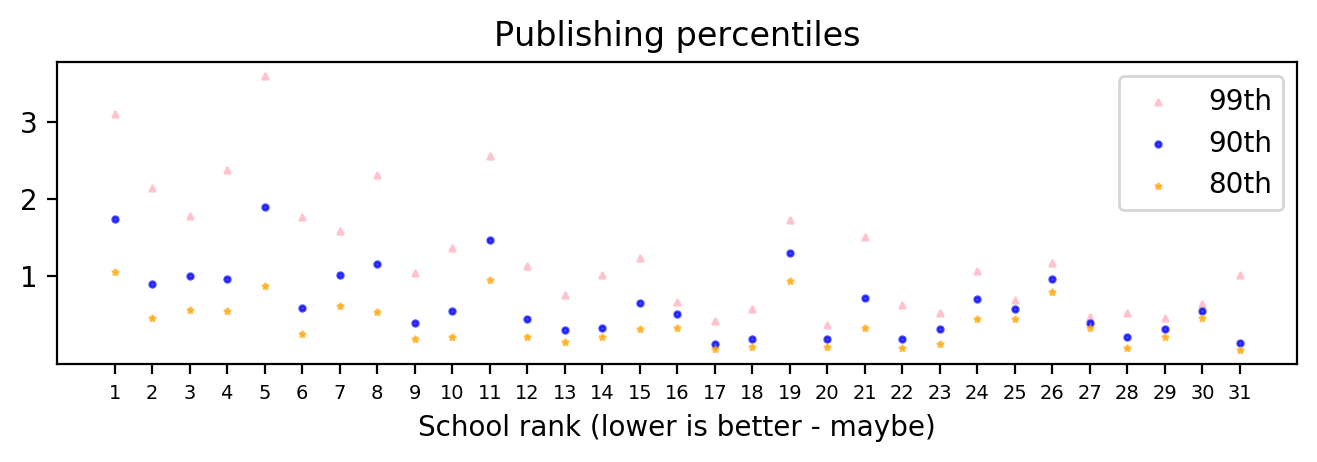

In [145]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(200)

xtick_names = [str(integer) for integer in range(1,32)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', color="pink", alpha=0.9, label="99th", s=4);
# ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["95th"], color="green", alpha=0.7, label="95th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', color="blue", alpha=0.7, label="90th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*', color="orange", alpha=0.7, label="80th", s=4);
ax.set(title="Publishing percentiles");
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("School rank (lower is better - maybe)", fontsize=10)
ax.set_yticks([1,2,3])
# ax.set_ylabel("Mean AER\nequivalent papers", rotation=45)
ax.legend();

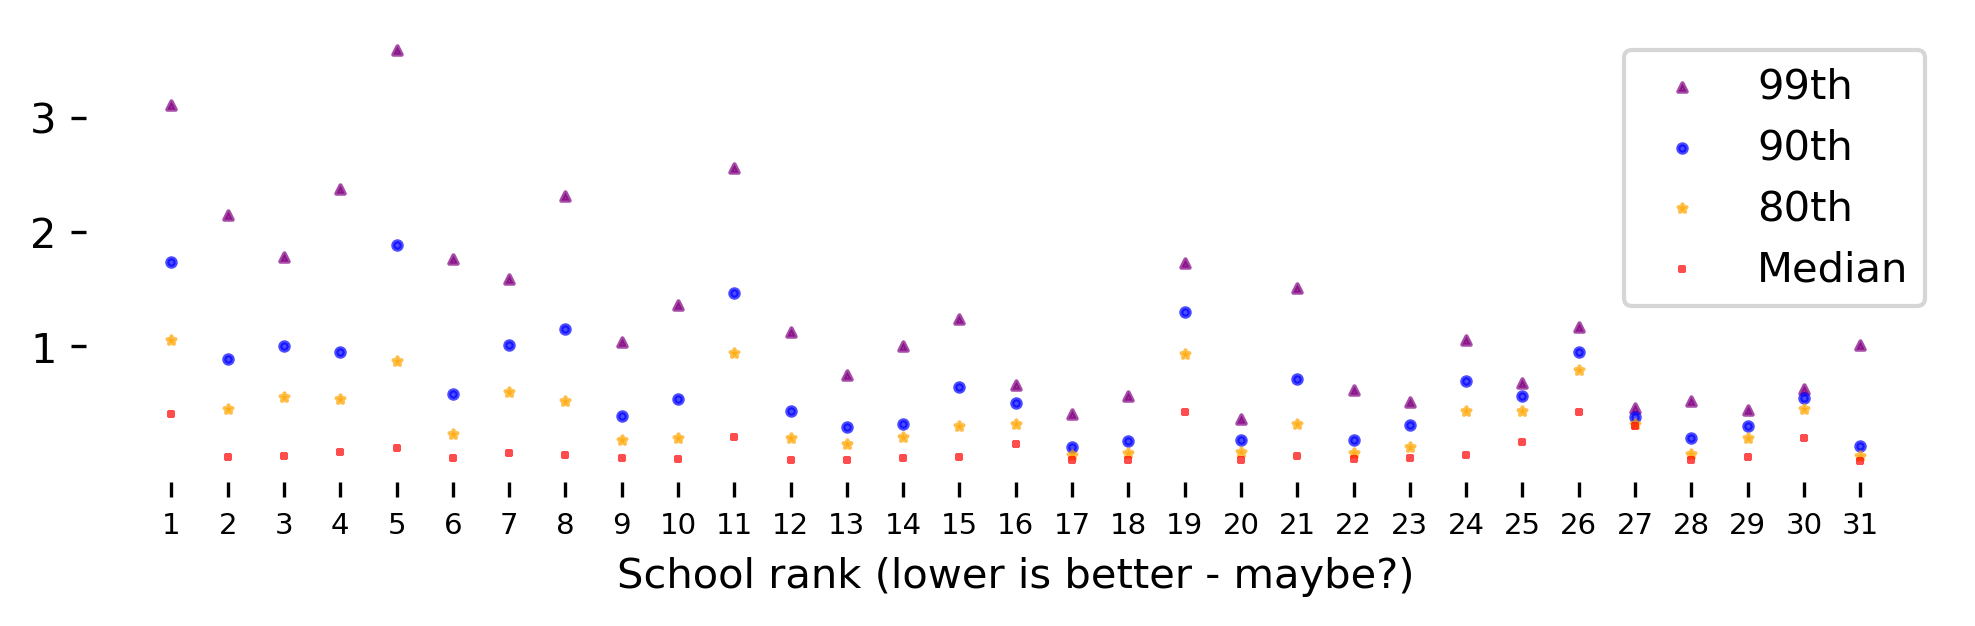

In [174]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

xtick_names = [str(integer) for integer in range(1,32)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', color="purple", alpha=0.7, label="99th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', color="blue", alpha=0.7, label="90th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*', color="orange", alpha=0.7, label="80th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="red", alpha=0.7, label="Median", s=4);
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("School rank (lower is better - maybe?)", fontsize=10)
ax.set_yticks([1,2,3])

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.legend();

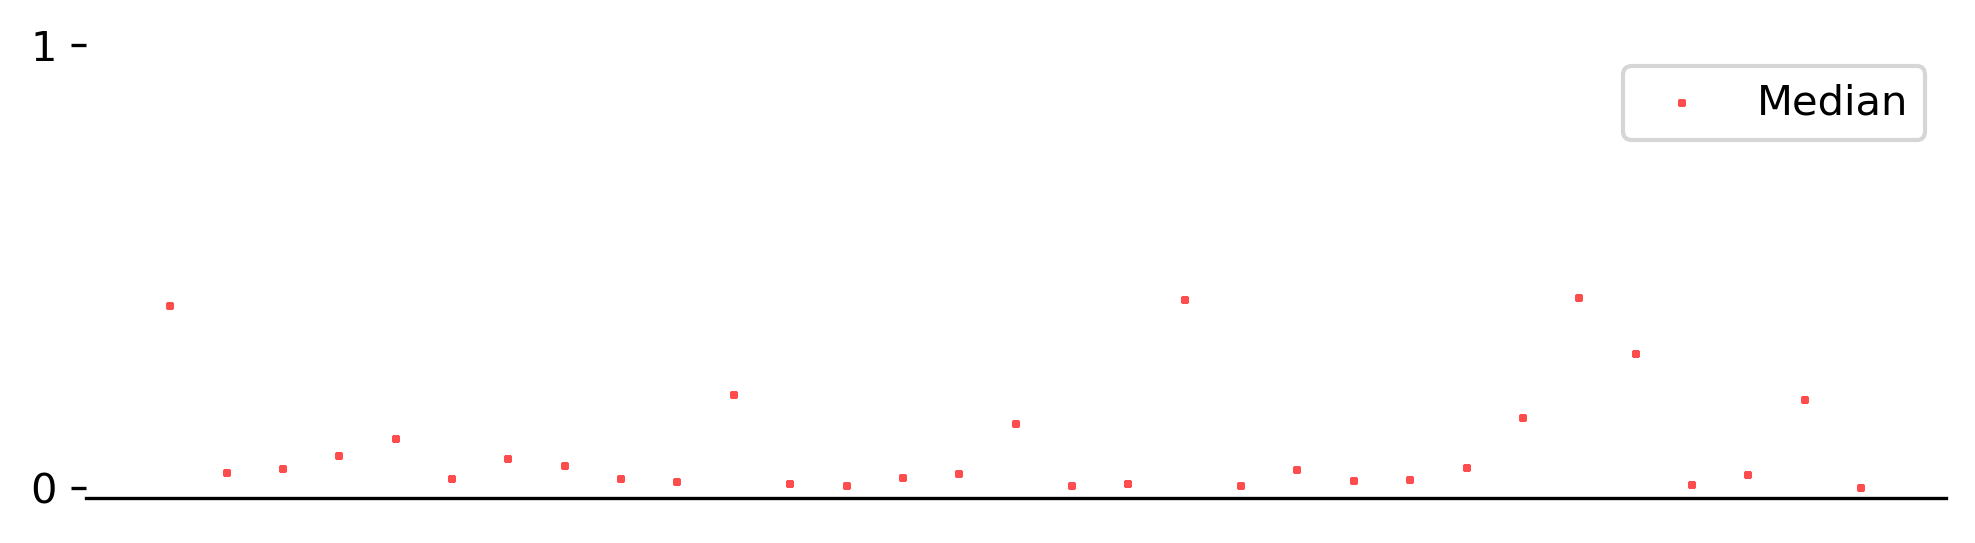

In [195]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

new_order = mean_aer_quantiles.index.values
np.random.shuffle(new_order)
shuffled_quantiles = mean_aer_quantiles.copy()
shuffled_quantiles.reindex(new_order)

# ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', color="purple", alpha=0.7, label="99th", s=4);
# ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', color="blue", alpha=0.7, label="90th", s=4);
# ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*', color="orange", alpha=0.7, label="80th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="red", alpha=0.7, label="Median", s=4);
# ax.set_xticks(range(1,32))
# ax.set_xticklabels(xtick_names, fontsize=7)
# ax.set_xlabel("School rank (lower is better - maybe?)", fontsize=10)
ax.set_yticks([0,1])
ax.set_xticklabels([])
ax.set_xticks([])

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)

ax.legend();